In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale=1.25)
sns.set_palette("colorblind")

In [11]:
def read_results_to_dfs(resfile, h2cis=None, param2=None, label='param2'):
    """
    Read results file and extract info to a dataframe (with FDR or Power to be used as y axis).
    Specify either h2cis or the other parameter and allow the other parameter to vary (forming the x axis).
    Param2 is something else like negpct or h2noncis that we allow to vary. 
    label is the label for the X axis in the plot we will make.
    """
    h2cis_skipvals=[0.01]
    param2_skipvals=[]
    df = {'Method': [], 'FDR': [], 'Power': [], label: []}
    
    skip_setting = True  # skip setting if it doesn't match h2cis or param2 argument
    this_h2cis, this_param2 = 0.0, 0.0  # hold h2cis and param2 for sim setting currently being read
    with(open(resfile, 'r')) as infile:
        for line in infile:
            if line.startswith('Tabulated'):  # then it's a header line describing sim settings
                splits = line.split('/')[-2].split('_')
                this_h2cis = float(splits[1])
                this_param2 = float(splits[3])
                if h2cis is not None and this_h2cis != h2cis:
                    skip_setting = True
                elif param2 is not None and this_param2 != param2:
                    skip_setting = True
                elif this_h2cis in h2cis_skipvals or this_param2 in param2_skipvals:
                    skip_setting = True
                else:
                    skip_setting = False
            elif not skip_setting:
                if line.startswith('Precision'):
                    fdr = 1.0 - float(line.strip().split()[1])
                    df['FDR'].append(fdr)
                elif line.startswith('Recall'):
                    power = float(line.strip().split()[1])
                    df['Power'].append(power)
                elif line.startswith('F1'):  # skip F1 score lines, currently
                    continue
                elif len(line) < 5:  # skip blank lines
                    continue
                else:  # if none of the above, line has method name
                    method = line.split()[0]
                    if method == 'QTLtools_gene':
                        method = 'QTLtools_sum'
                    method = method.replace('grp', '')
                    df['Method'].append(method)
                    if h2cis is None:
                        df[label].append(this_h2cis)
                    if param2 is None:
                        df[label].append(this_param2)
    #print(df)
    return pd.DataFrame(df)


In [12]:
cis_lab = 'eQTL var explained in cis'
negpct_lab = '% neg. corr. iso effects'
noncis_lab = 'eQTL var explained non-cis'
h2cis_df = read_results_to_dfs('results/mvn_genomewide_numiso_4_results_negpct.txt', 
                               h2cis=None, param2=0.5, label=cis_lab)
negpct_df = read_results_to_dfs('results/mvn_genomewide_numiso_4_results_negpct.txt', 
                                h2cis=0.05, param2=None, label=negpct_lab)
noncis_df = read_results_to_dfs('results/mvn_genomewide_numiso_4_results_h2noncis.txt', 
                                h2cis=0.05, param2=None, label=noncis_lab)
h2cis_df.head()

,Method,FDR,Power,eQTL var explained in cis
0,Wilks-Bartlett,0.000000,0.152875,0.05
1,QTLtools_sum,0.033333,0.081346,0.05
2,QTLtools_best,0.053476,0.248247,0.05
3,QTLtools_pca1,0.047619,0.280505,0.05
4,QTLtools_mean,0.032787,0.082749,0.05


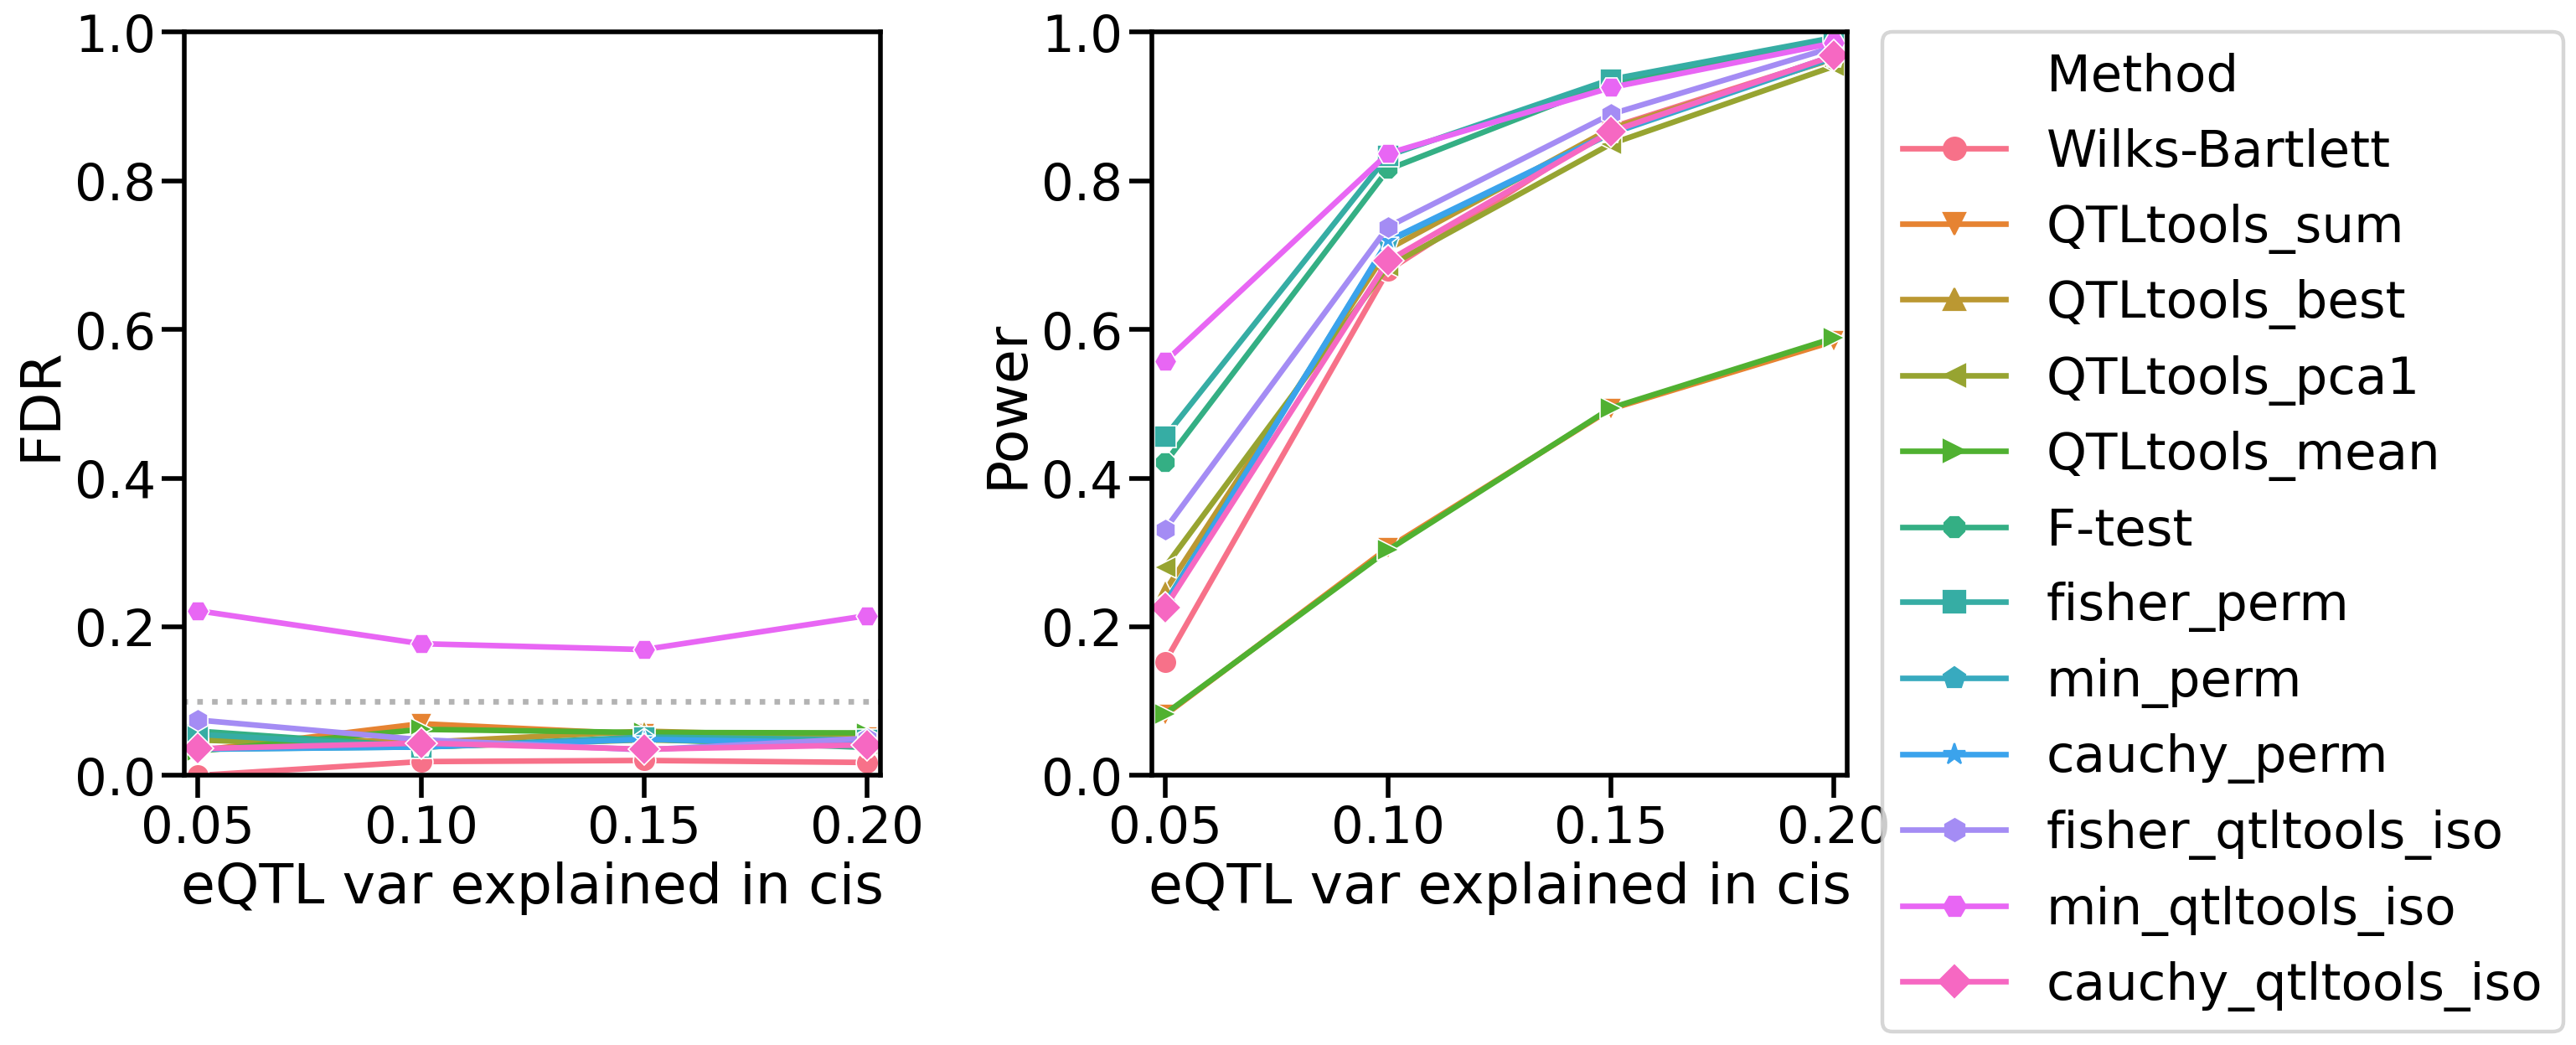

In [13]:
sns.set_context("poster", font_scale=1.25)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(num=None, figsize=(20, 8), dpi=160, facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace = 0.3)

plt.subplot(1,2,1)
ax = sns.lineplot(data=h2cis_df, x=cis_lab, y="FDR", 
             hue="Method", style="Method", markers=filled_markers, dashes=False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend([],[], frameon=False)
ax.hlines(0.1, 0.00, 1.05, linestyles='dotted', color='#b3b3b3')
plt.xlim(0.047, 0.203)
plt.ylim(0.00, 1.0)
#plt.title('FDR for varying eQTL signal strength')

plt.subplot(1,2,2)
sns.lineplot(data=h2cis_df, x=cis_lab, y="Power", 
             hue="Method", style="Method", markers=filled_markers, dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0.047, 0.203)
plt.ylim(0.00, 1.0)
#plt.title('Power for varying eQTL signal strength')
plt.tight_layout()
plt.savefig('isoqtl_sim_res_varying_h2.png')

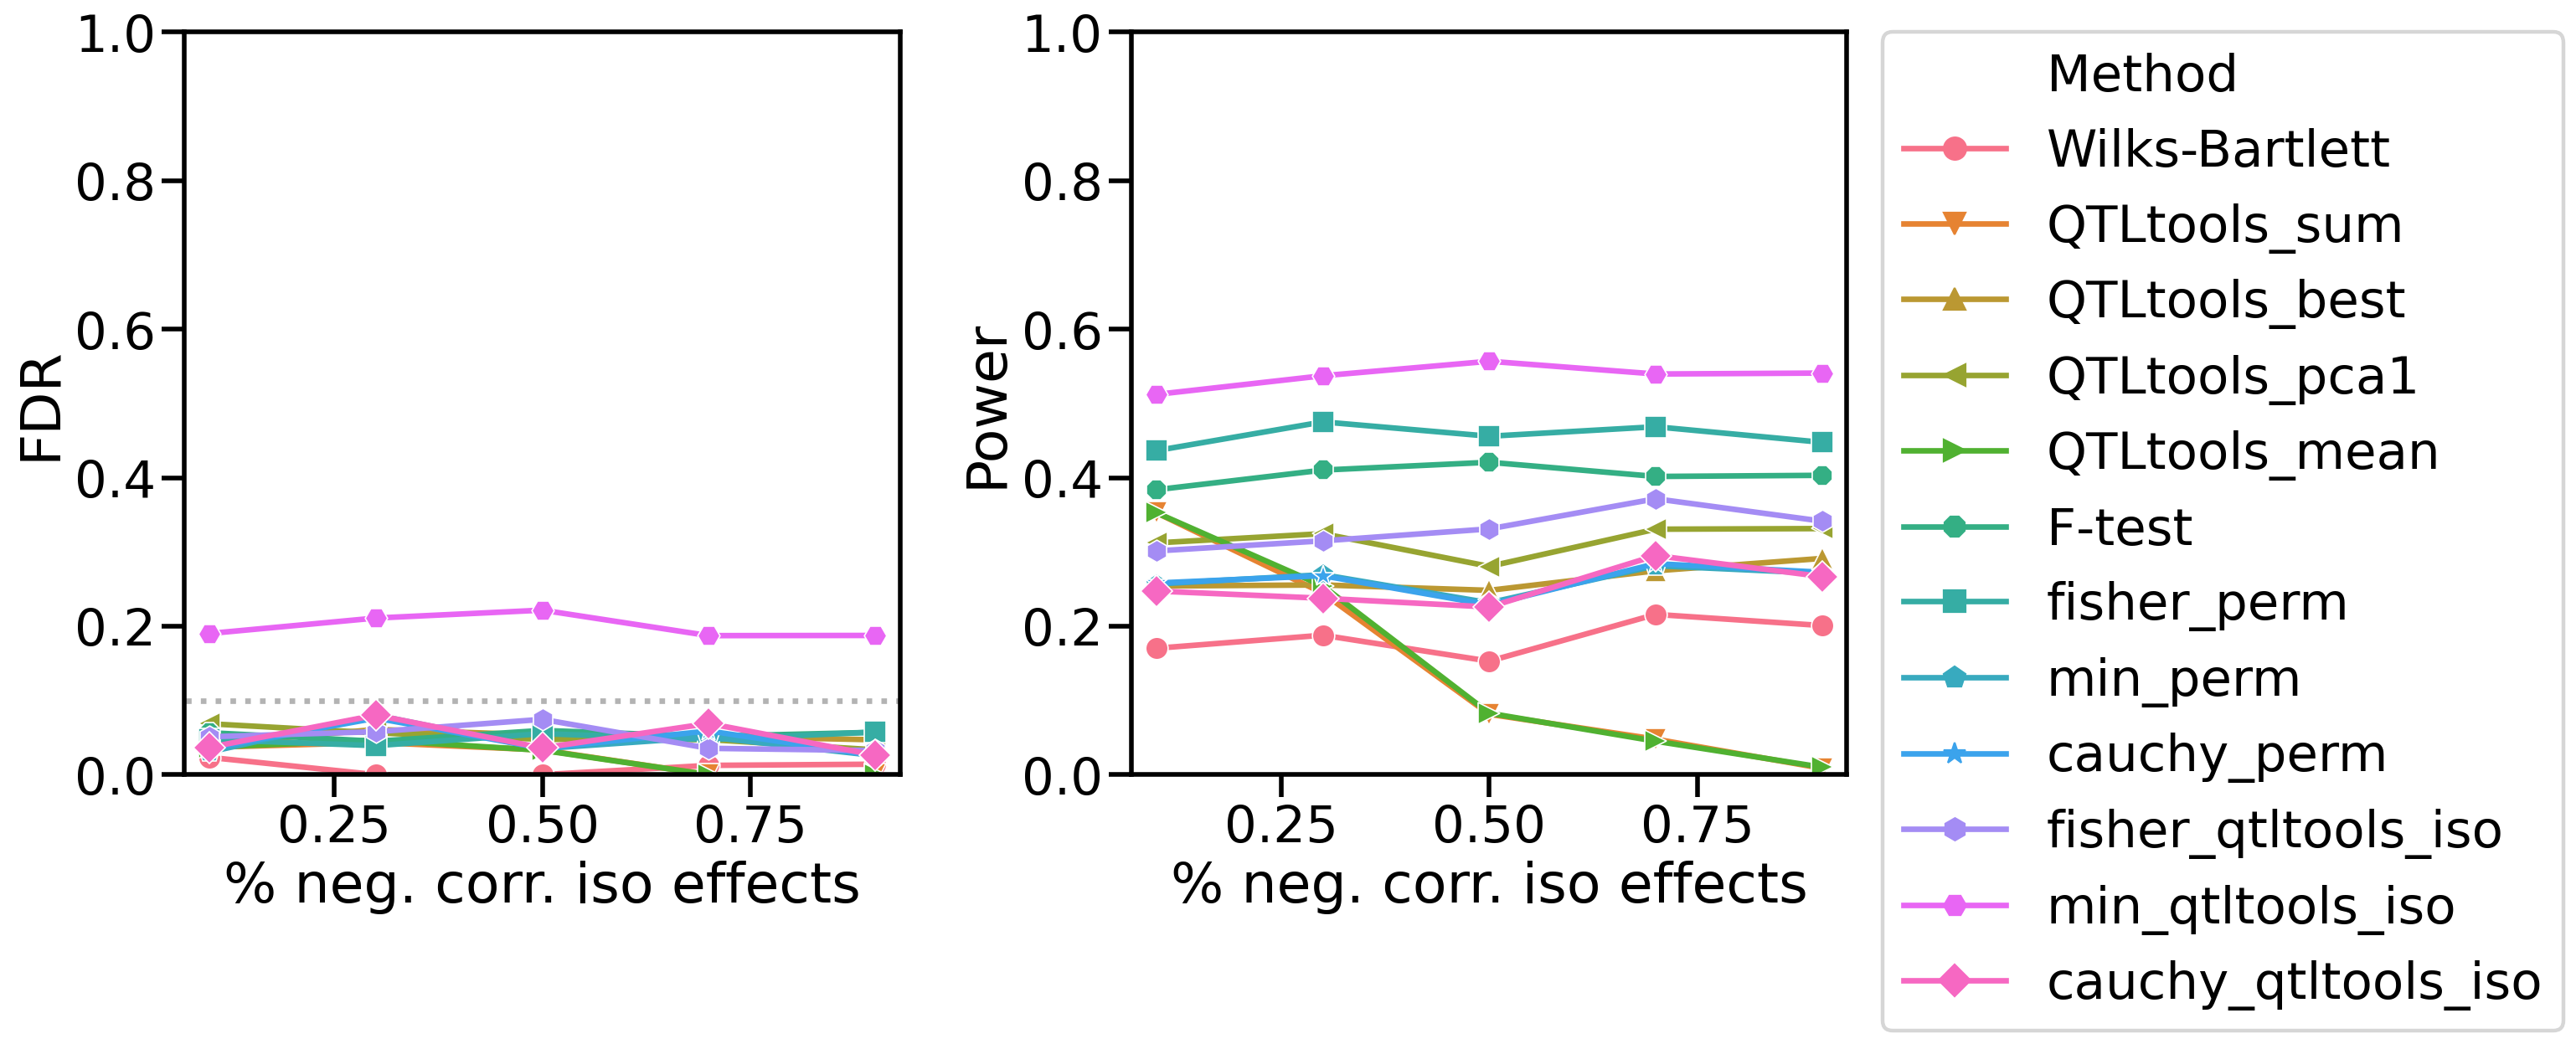

In [14]:
sns.set_context("poster", font_scale=1.25)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(num=None, figsize=(20, 8), dpi=160, facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace = 0.3)

plt.subplot(1,2,1)
ax = sns.lineplot(data=negpct_df, x=negpct_lab, y="FDR", 
             hue="Method", style="Method", markers=filled_markers, dashes=False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend([],[], frameon=False)
ax.hlines(0.1, 0.00, 1.05, linestyles='dotted', color='#b3b3b3')
plt.xlim(0.07, 0.93)
plt.ylim(0.00, 1.0)
#plt.title('FDR for varying correlation between isoform cis effects')

plt.subplot(1,2,2)
sns.lineplot(data=negpct_df, x=negpct_lab, y="Power", 
             hue="Method", style="Method", markers=filled_markers, dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0.07, 0.93)
plt.ylim(0.00, 1.0)
#plt.title('Power for varying correlation between isoform cis effects')
plt.tight_layout()
plt.savefig('isoqtl_sim_res_varying_negpct.png')

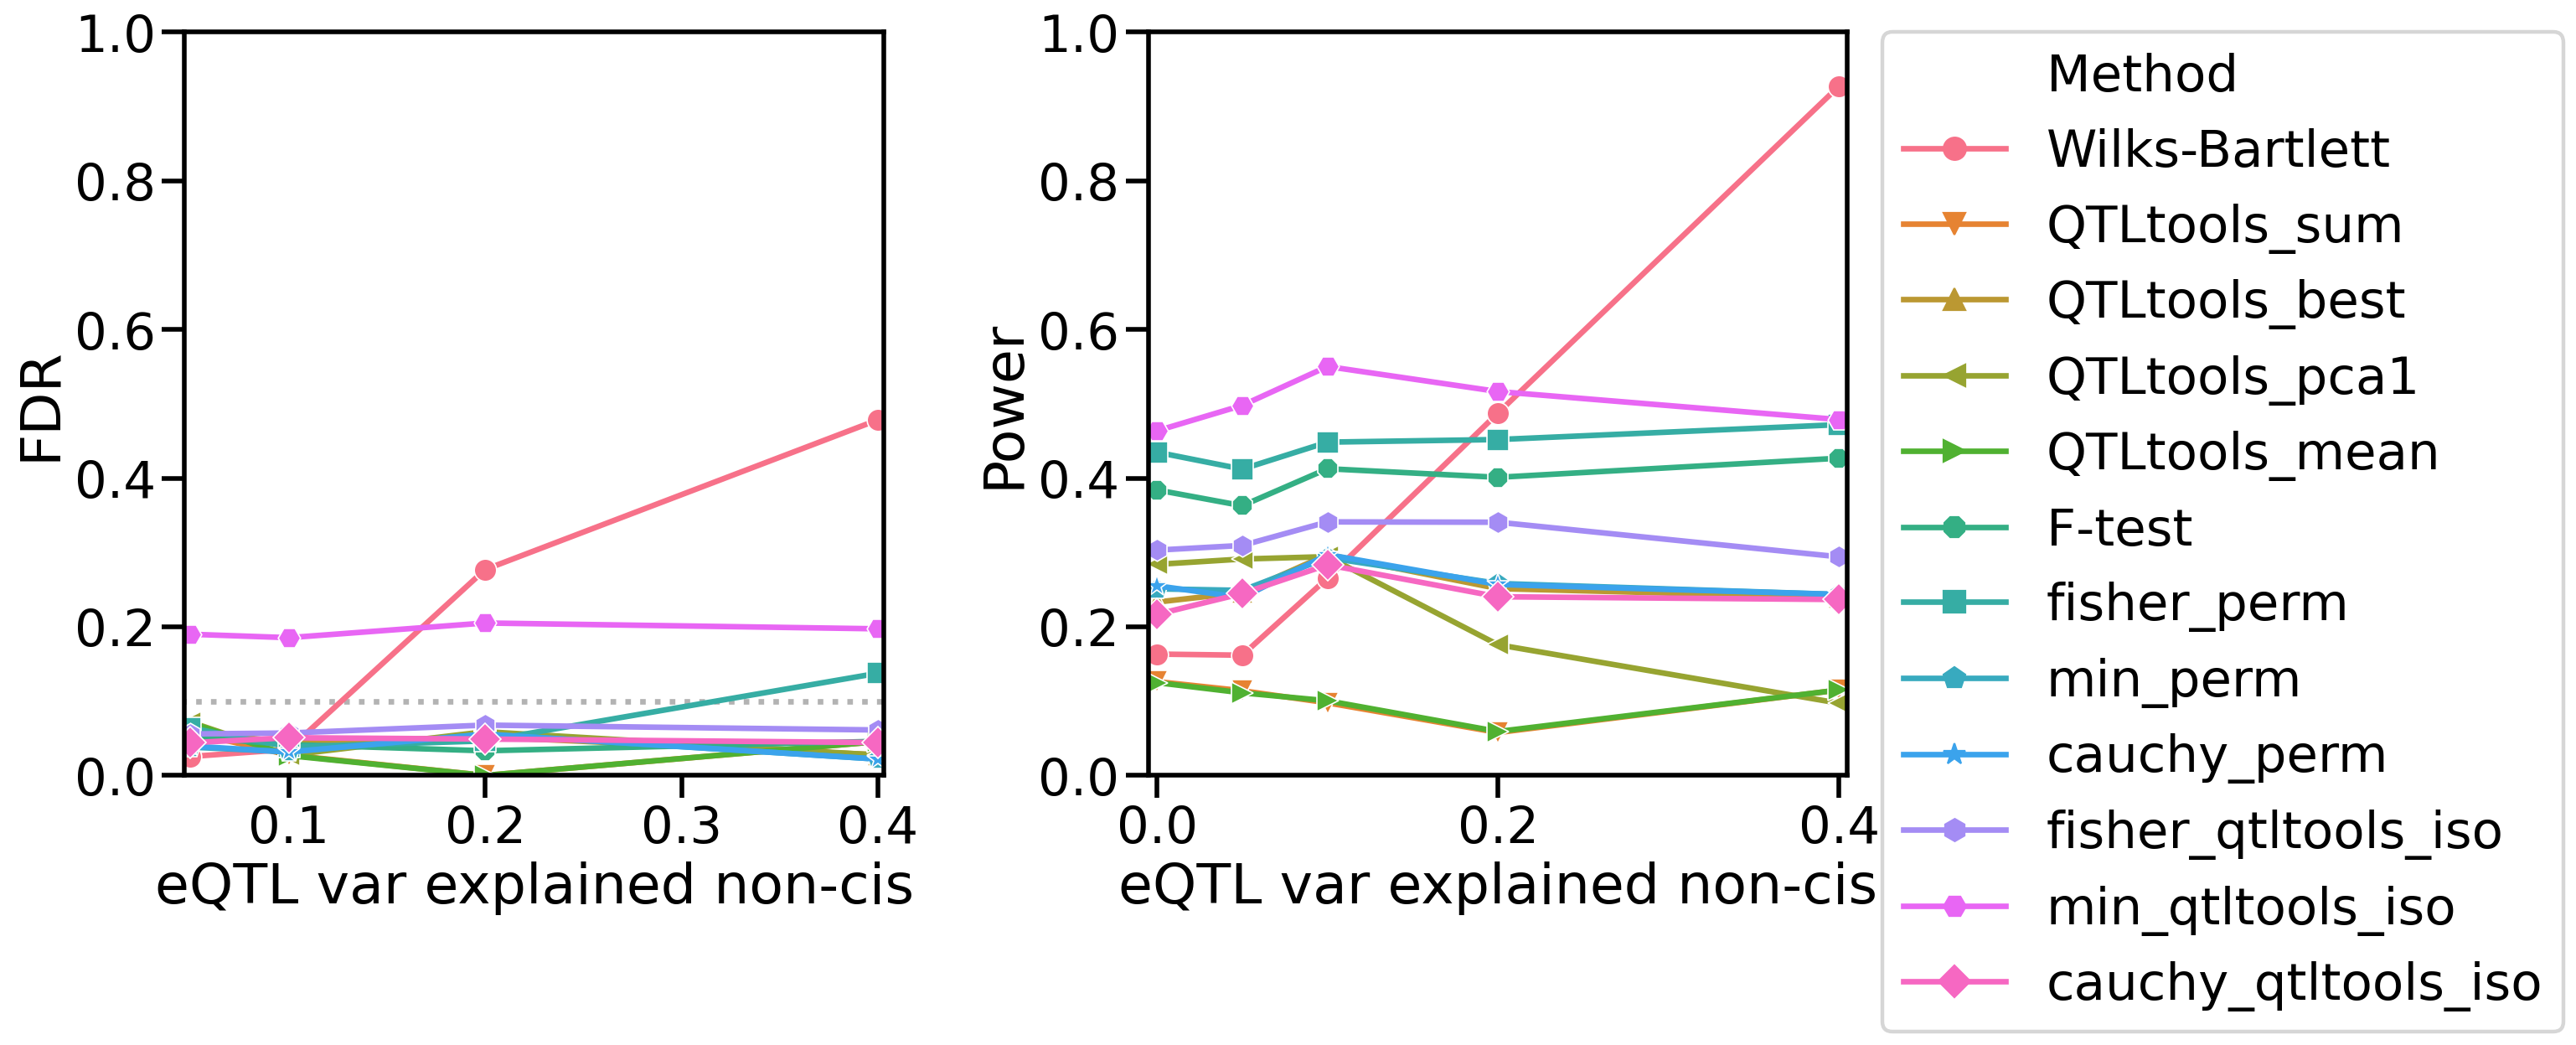

In [15]:
sns.set_context("poster", font_scale=1.25)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(num=None, figsize=(20, 8), dpi=160, facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace = 0.3)

plt.subplot(1,2,1)
ax = sns.lineplot(data=noncis_df, x=noncis_lab, y="FDR", 
             hue="Method", style="Method", markers=filled_markers, dashes=False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend([],[], frameon=False)
ax.hlines(0.1, 0.00, 1.05, linestyles='dotted', color='#b3b3b3')
plt.xlim(0.047, 0.403)
plt.ylim(0.00, 1.0)
#plt.title('FDR for varying correlation between isoform cis effects')

plt.subplot(1,2,2)
sns.lineplot(data=noncis_df, x=noncis_lab, y="Power", 
             hue="Method", style="Method", markers=filled_markers, dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(-0.005, 0.405)
plt.ylim(0.00, 1.0)
#plt.title('Power for varying correlation between isoform cis effects')
plt.tight_layout()
plt.savefig('isoqtl_sim_res_varying_noncis.png')

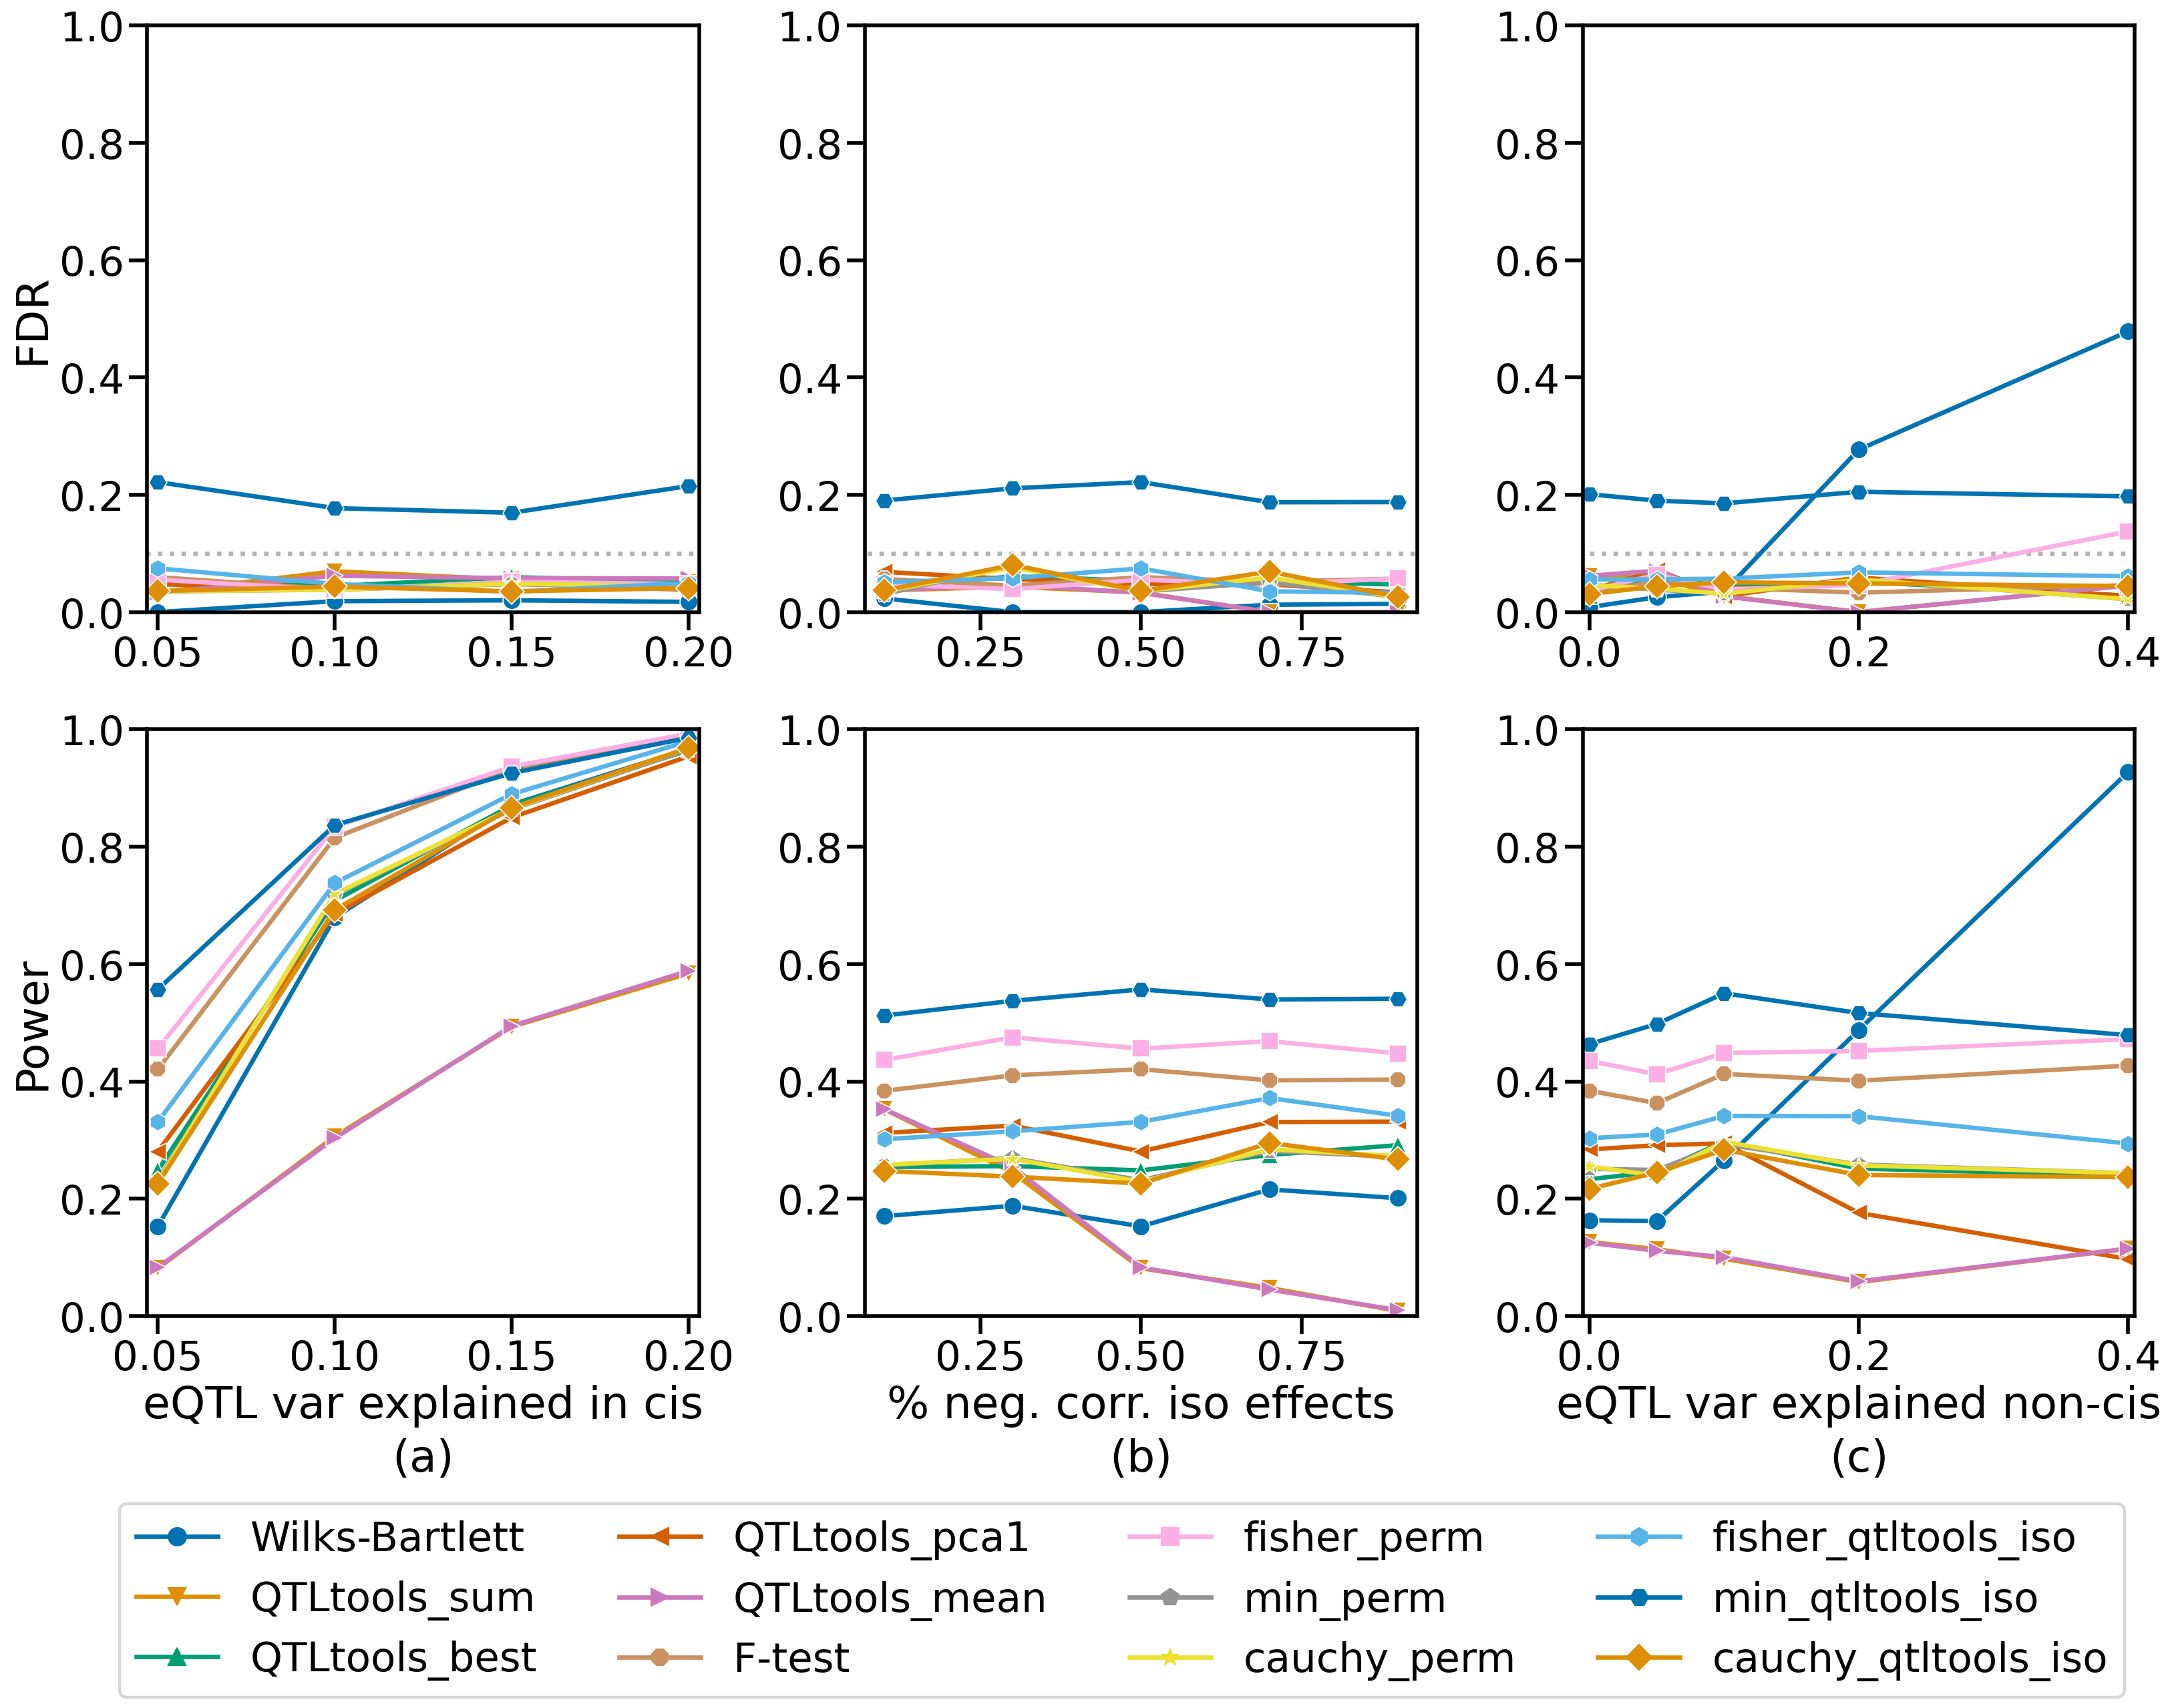

In [21]:
sns.set_context("poster", font_scale=1.25)
sns.set_palette("colorblind")
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(num=None, figsize=(24, 16), dpi=160, facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace = 0.3)

plt.subplot(2,3,1)
ax = sns.lineplot(data=h2cis_df, x=cis_lab, y="FDR", 
                 hue="Method", style="Method", markers=filled_markers, dashes=False,
                 palette=sns.color_palette('colorblind', n_colors=12))
#h, l = ax.get_legend_handles_labels()
#lgd = plt.legend(h[1:], l[1:], bbox_to_anchor=(-0.05, -0.65), loc='lower left', borderaxespad=0., ncol=4)
plt.legend([],[], frameon=False)
ax.hlines(0.1, 0.00, 1.05, linestyles='dotted', color='#b3b3b3')
plt.xlim(0.047, 0.203)
plt.ylim(0.00, 1.0)
plt.xlabel('')
#plt.title('(a)', y=-0.28)

plt.subplot(2,3,2)
ax = sns.lineplot(data=negpct_df, x=negpct_lab, y="FDR", 
             hue="Method", style="Method", markers=filled_markers, dashes=False,
                 palette=sns.color_palette('colorblind', n_colors=12))
#h, l = ax.get_legend_handles_labels()
#lgd = plt.legend(h[1:], l[1:], bbox_to_anchor=(-0.05, -0.65), loc='lower left', borderaxespad=0., ncol=4)
plt.legend([],[], frameon=False)
ax.hlines(0.1, 0.00, 1.05, linestyles='dotted', color='#b3b3b3')
plt.xlim(0.07, 0.93)
plt.ylim(0.00, 1.0)
plt.xlabel('')
plt.ylabel('')
#plt.title('(b)', y=-0.28)

plt.subplot(2,3,3)
ax = sns.lineplot(data=noncis_df, x=noncis_lab, y="FDR", 
             hue="Method", style="Method", markers=filled_markers, dashes=False,
                 palette=sns.color_palette('colorblind', n_colors=12))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend([],[], frameon=False)
#h, l = ax.get_legend_handles_labels()
#lgd = plt.legend(h[1:], l[1:], bbox_to_anchor=(-0.05, -0.65), loc='lower left', borderaxespad=0., ncol=4)
plt.legend([],[], frameon=False)
ax.hlines(0.1, 0.00, 1.05, linestyles='dotted', color='#b3b3b3')
plt.xlim(-0.005, 0.405)
plt.ylim(0.00, 1.0)
plt.xlabel('')
plt.ylabel('')
#plt.title('(c)', y=-0.28)

plt.subplot(2,3,4)
sns.lineplot(data=h2cis_df, x=cis_lab, y="Power", 
             hue="Method", style="Method", markers=filled_markers, dashes=False,
                 palette=sns.color_palette('colorblind', n_colors=12))
#plt.legend([],[], frameon=False)
#plt.legend(bbox_to_anchor=(-1, -0.3), loc=2, borderaxespad=0., ncol=4)
h, l = ax.get_legend_handles_labels()
lgd = plt.legend(h[1:], l[1:], bbox_to_anchor=(-0.05, -0.65), loc='lower left', borderaxespad=0., ncol=4)
plt.xlim(0.047, 0.203)
plt.ylim(0.00, 1.0)
plt.title('(a)', y=-0.28)

plt.subplot(2,3,5)
sns.lineplot(data=negpct_df, x=negpct_lab, y="Power", 
             hue="Method", style="Method", markers=filled_markers, dashes=False,
                 palette=sns.color_palette('colorblind', n_colors=12))
plt.legend([],[], frameon=False)
#plt.legend(bbox_to_anchor=(-1, -0.3), loc=2, borderaxespad=0., ncol=4)
plt.xlim(0.07, 0.93)
plt.ylim(0.00, 1.0)
plt.ylabel('')
plt.title('(b)', y=-0.28)

plt.subplot(2,3,6)
sns.lineplot(data=noncis_df, x=noncis_lab, y="Power", 
             hue="Method", style="Method", markers=filled_markers, dashes=False,
                 palette=sns.color_palette('colorblind', n_colors=12))
plt.legend([],[], frameon=False)
plt.xlim(-0.005, 0.405)
plt.ylim(0.00, 1.0)
plt.ylabel('')
plt.title('(c)', y=-0.28)

#plt.tight_layout()
plt.savefig('isoqtl_sim_res_combined.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [30]:
methods_to_remove = ['QTLtools_sum', 'cauchy_perm', 'cauchy_qtltools_iso']
subset_h2cis_df, subset_negpct_df, subset_noncis_df = h2cis_df, negpct_df, noncis_df
for m in methods_to_remove:
    subset_h2cis_df = subset_h2cis_df[subset_h2cis_df['Method'] != m]
    subset_negpct_df = subset_negpct_df[subset_negpct_df['Method'] != m]
    subset_noncis_df = subset_noncis_df[subset_noncis_df['Method'] != m]

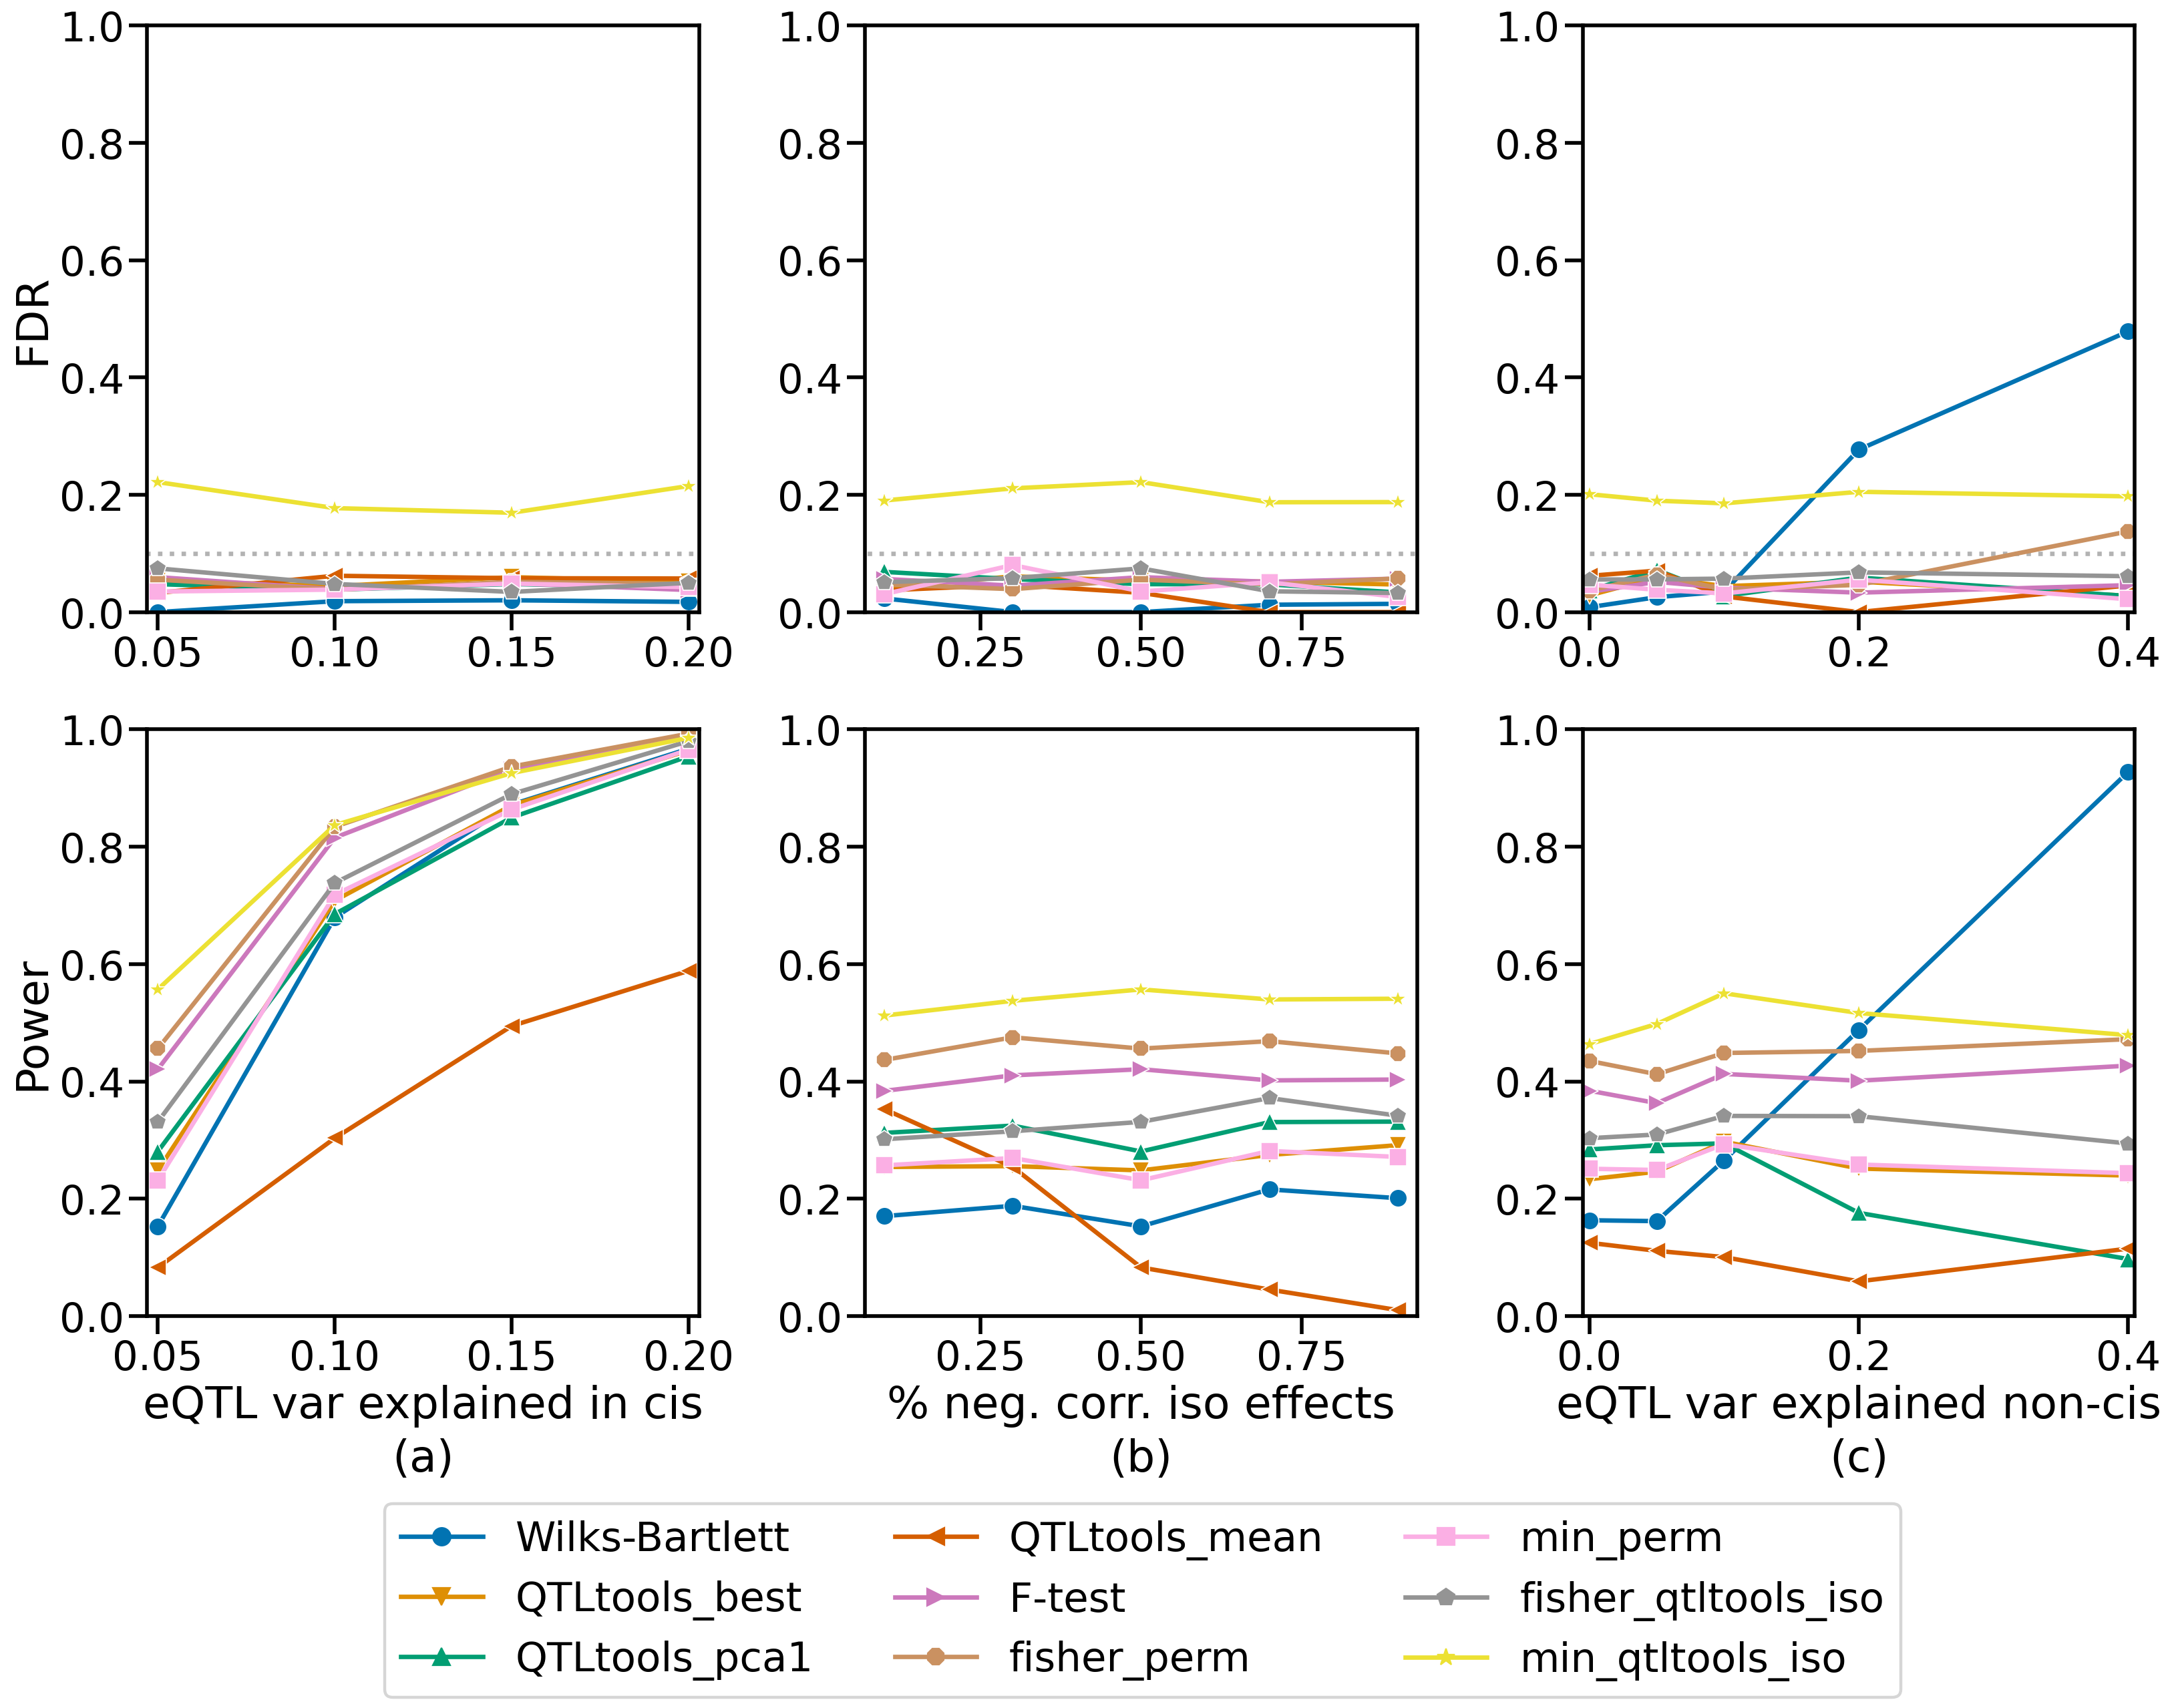

In [39]:
sns.set_context("poster", font_scale=1.25)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(num=None, figsize=(24, 16), dpi=160, facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace = 0.3)

plt.subplot(2,3,1)
ax = sns.lineplot(data=subset_h2cis_df, x=cis_lab, y="FDR", 
             hue="Method", style="Method", markers=filled_markers, dashes=False,
                 palette=sns.color_palette('colorblind', n_colors=9))
#h, l = ax.get_legend_handles_labels()
#lgd = plt.legend(h[1:], l[1:], bbox_to_anchor=(-0.05, -0.65), loc='lower left', borderaxespad=0., ncol=4)
plt.legend([],[], frameon=False)
ax.hlines(0.1, 0.00, 1.05, linestyles='dotted', color='#b3b3b3')
plt.xlim(0.047, 0.203)
plt.ylim(0.00, 1.0)
plt.xlabel('')
#plt.title('(a)', y=-0.28)

plt.subplot(2,3,2)
ax = sns.lineplot(data=subset_negpct_df, x=negpct_lab, y="FDR", 
             hue="Method", style="Method", markers=filled_markers, dashes=False,
                 palette=sns.color_palette('colorblind', n_colors=9))
#h, l = ax.get_legend_handles_labels()
#lgd = plt.legend(h[1:], l[1:], bbox_to_anchor=(-0.05, -0.65), loc='lower left', borderaxespad=0., ncol=4)
plt.legend([],[], frameon=False)
ax.hlines(0.1, 0.00, 1.05, linestyles='dotted', color='#b3b3b3')
plt.xlim(0.07, 0.93)
plt.ylim(0.00, 1.0)
plt.xlabel('')
plt.ylabel('')
#plt.title('(b)', y=-0.28)

plt.subplot(2,3,3)
ax = sns.lineplot(data=subset_noncis_df, x=noncis_lab, y="FDR", 
             hue="Method", style="Method", markers=filled_markers, dashes=False,
                 palette=sns.color_palette('colorblind', n_colors=9))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend([],[], frameon=False)
#h, l = ax.get_legend_handles_labels()
#lgd = plt.legend(h[1:], l[1:], bbox_to_anchor=(-0.05, -0.65), loc='lower left', borderaxespad=0., ncol=4)
plt.legend([],[], frameon=False)
ax.hlines(0.1, 0.00, 1.05, linestyles='dotted', color='#b3b3b3')
plt.xlim(-0.005, 0.405)
plt.ylim(0.00, 1.0)
plt.xlabel('')
plt.ylabel('')
#plt.title('(c)', y=-0.28)

plt.subplot(2,3,4)
sns.lineplot(data=subset_h2cis_df, x=cis_lab, y="Power", 
             hue="Method", style="Method", markers=filled_markers, dashes=False,
                 palette=sns.color_palette('colorblind', n_colors=9))
#plt.legend([],[], frameon=False)
#plt.legend(bbox_to_anchor=(-1, -0.3), loc=2, borderaxespad=0., ncol=4)
h, l = ax.get_legend_handles_labels()
lgd = plt.legend(h[1:], l[1:], bbox_to_anchor=(0.43, -0.65), loc='lower left', borderaxespad=0., ncol=3)
plt.xlim(0.047, 0.203)
plt.ylim(0.00, 1.0)
plt.title('(a)', y=-0.28)

plt.subplot(2,3,5)
sns.lineplot(data=subset_negpct_df, x=negpct_lab, y="Power", 
             hue="Method", style="Method", markers=filled_markers, dashes=False,
                 palette=sns.color_palette('colorblind', n_colors=9))
plt.legend([],[], frameon=False)
#plt.legend(bbox_to_anchor=(-1, -0.3), loc=2, borderaxespad=0., ncol=4)
plt.xlim(0.07, 0.93)
plt.ylim(0.00, 1.0)
plt.ylabel('')
plt.title('(b)', y=-0.28)

plt.subplot(2,3,6)
sns.lineplot(data=subset_noncis_df, x=noncis_lab, y="Power", 
             hue="Method", style="Method", markers=filled_markers, dashes=False,
                 palette=sns.color_palette('colorblind', n_colors=9))
plt.legend([],[], frameon=False)
plt.xlim(-0.005, 0.405)
plt.ylim(0.00, 1.0)
plt.ylabel('')
plt.title('(c)', y=-0.28)

#plt.tight_layout()
plt.savefig('isoqtl_sim_res_combined_subset.png', bbox_extra_artists=(lgd,), bbox_inches='tight')